In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import np_utils

import matplotlib.pyplot as plt

seed=7
numpy.random.seed(seed)


Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')


In [5]:
#normalize

X_train = X_train/250
X_test = X_test/250

In [6]:
# one hot encoding

Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test, num_classes=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 33s - loss: 0.2469 - acc: 0.9302 - val_loss: 0.1177 - val_acc: 0.9664
Epoch 2/15
 - 29s - loss: 0.0965 - acc: 0.9706 - val_loss: 0.0814 - val_acc: 0.9750
Epoch 3/15
 - 29s - loss: 0.0600 - acc: 0.9821 - val_loss: 0.0775 - val_acc: 0.9763
Epoch 4/15
 - 29s - loss: 0.0444 - acc: 0.9864 - val_loss: 0.0807 - val_acc: 0.9757
Epoch 5/15
 - 29s - loss: 0.0310 - acc: 0.9907 - val_loss: 0.0645 - val_acc: 0.9805
Epoch 6/15
 - 29s - loss: 0.0208 - acc: 0.9940 - val_loss: 0.0664 - val_acc: 0.9785
Epoch 7/15
 - 29s - loss: 0.0170 - acc: 0.9950 - val_loss: 0.0722 - val_acc: 0.9776
Epoch 8/15
 - 29s - loss: 0.0152 - acc: 0.9954 - val_loss: 0.0636 - val_acc: 0.9825
Epoch 9/15
 - 29s - loss: 0.0104 - acc: 0.9970 - val_loss: 0.0749 - val_acc: 0.9798
Epoch 10/15
 - 30s - loss: 0.0082 - acc: 0.9976 - val_loss: 0.0776 - val_acc: 0.9787
Epoch 11/15
 - 29s - loss: 0.0106 - acc: 0.9967 - val_loss: 0.0750 - val_acc: 0.9792
Epoch 12/15
 - 29s - los

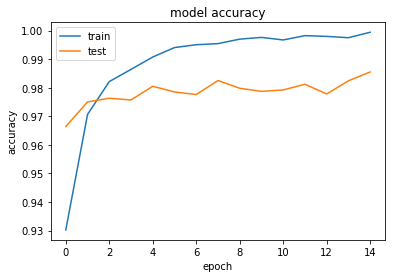

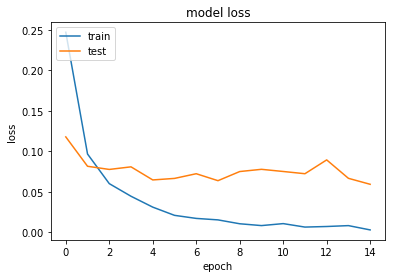

In [10]:
model = Sequential()
model.add(Dense(800, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=100, verbose=2)


#scores = model.evaluate(X_test, Y_test, verbose=0)
#print("Error: %.2f%% " % (100-scores[1]*100))


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


